<a href="https://colab.research.google.com/github/sebasbrowar/FisicaComputacional1/blob/main/Evaluacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 2 - Sebastián Browarski Ruiz

(5 de Abril de 2021)

Se pide resolver numéricamente la ecuación diferencial de un [oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal](https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force), con ayuda de la función *odeint* de *scipy.integrate*.

La ecuación diferencial del oscilador amortiguado es

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}

y $\zeta$ es la tasa de amortiguamiento dado por la expresión

\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}

siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire. 

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$). 

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:


* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular.

## Problema1.

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$: 

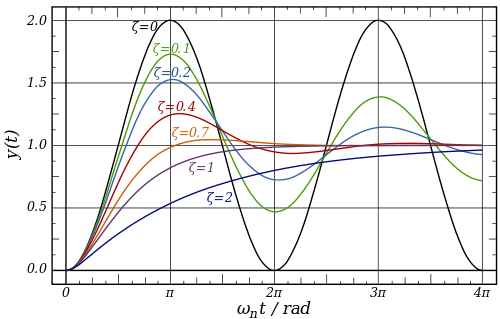

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

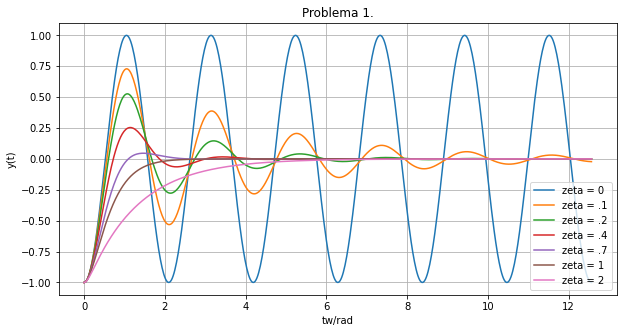

In [86]:
# ecuacion diferencial del oscilador amortiguado, notamos que F=0
def ode(y, t, zeta, omega0):
    x, dxdt = y
    dydt = -2*zeta*omega0*dxdt - (omega0**2)*x
    return [dxdt, dydt]

# Tiempo de integracion
t0=0
tmax=4*np.pi
Npts=600
t = np.linspace(t0,tmax,Npts)

# condiciones iniciales
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [-1.0, 0.0]

# distintos casos de amortiguamiento
zeta0 = 0.0
zeta1 = 0.1
zeta2 = 0.2
zeta3 = 0.4
zeta4 = 0.7
zeta5 = 1.0
zeta6 = 2.0

omega0 = np.sqrt(9/1) # frecuencia angular natural del oscilador de masa=1 y constante k=9

# soluciones utilizando odeint
sol0 = odeint(ode, y_0, t, args=(zeta0,omega0,))
sol1 = odeint(ode, y_0, t, args=(zeta1,omega0,))
sol2 = odeint(ode, y_0, t, args=(zeta2,omega0,))
sol3 = odeint(ode, y_0, t, args=(zeta3,omega0,))
sol4 = odeint(ode, y_0, t, args=(zeta4,omega0,))
sol5 = odeint(ode, y_0, t, args=(zeta5,omega0,))
sol6 = odeint(ode, y_0, t, args=(zeta6,omega0,))

# graficamos
plt.figure(figsize=(10,5))
plt.grid()
plt.title("Problema 1.")
plt.xlabel('tw/rad')
plt.ylabel('y(t)')

plt.plot(t, sol0[:,0], label='zeta = 0')
plt.plot(t, sol1[:,0], label='zeta = .1')
plt.plot(t, sol2[:,0], label='zeta = .2')
plt.plot(t, sol3[:,0], label='zeta = .4')
plt.plot(t, sol4[:,0], label='zeta = .7')
plt.plot(t, sol5[:,0], label='zeta = 1')
plt.plot(t, sol6[:,0], label='zeta = 2')

plt.legend(loc='best')
plt.show()

## Problema 2.

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

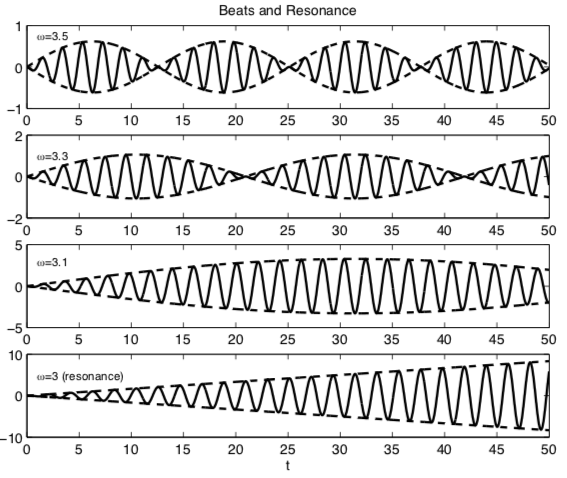

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

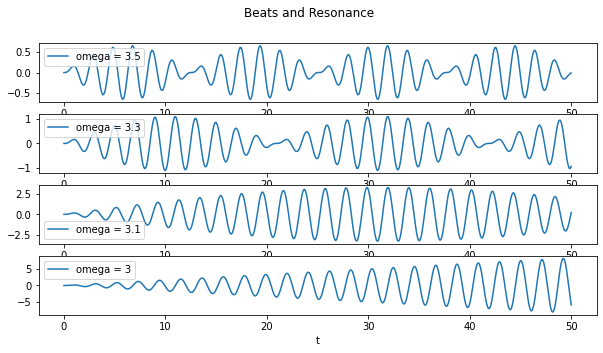

In [87]:
# ecuacion diferencial del oscilador amortiguado, notamos que F=1 y 1/m=1 por lo que no hace falta ponerlos
def ode(y, t, zeta, omega0, omegaf):
    x, dxdt = y
    dydt = -2*zeta*omega0*dxdt - omega0**2*x + np.sin(omegaf*t)
    return [dxdt, dydt]

# Tiempo de integracion
t0=0
tmax=50
Npts=600
t = np.linspace(t0,tmax,Npts)

# condiciones iniciales
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [0.0, 0.0]

zeta = 0.0 # coeficiente de amortiguamiento
omega0 = np.sqrt(9/1) # frecuencia angular natural del oscilador de masa=1 y constante k=9

# frecuencias de forzamiento
omegaf0 = 3.5
omegaf1 = 3.3
omegaf2 = 3.1
omegaf3 = 3.0

# soluciones utilizando odeint
sol0 = odeint(ode, y_0, t, args=(zeta,omega0,omegaf0,))
sol1 = odeint(ode, y_0, t, args=(zeta,omega0,omegaf1,))
sol2 = odeint(ode, y_0, t, args=(zeta,omega0,omegaf2,))
sol3 = odeint(ode, y_0, t, args=(zeta,omega0,omegaf3,))

# graficamos con subplots
fig, axs = plt.subplots(4,figsize=(10,5))
fig.suptitle('Beats and Resonance')
axs[0].plot(t, sol0[:,0], label='omega = 3.5')
axs[1].plot(t, sol1[:,0], label='omega = 3.3')
axs[2].plot(t, sol2[:,0], label='omega = 3.1')
axs[3].plot(t, sol3[:,0], label='omega = 3')

plt.xlabel('t')
axs[0].legend(loc='best');
axs[1].legend(loc='best');
axs[2].legend(loc='best');
axs[3].legend(loc='best');
plt.show()

## Problema 3.

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$. 

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado. 


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

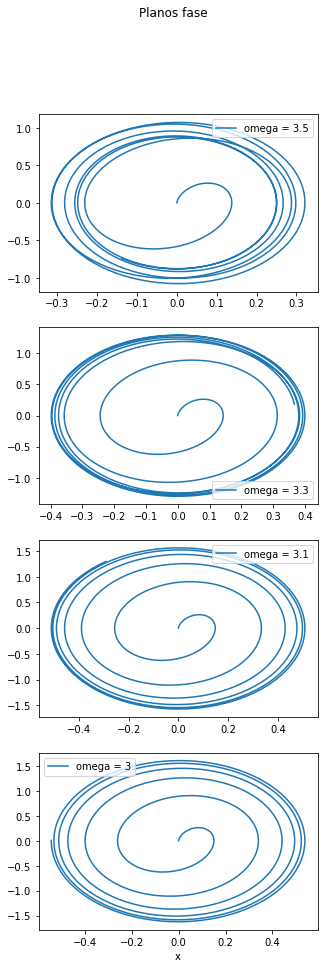

In [92]:
# ecuacion diferencial del oscilador amortiguado, notamos que F=1 y 1/m=1 por lo que no hace falta ponerlos
def ode(y, t, zeta, omega0, omegaf):
    x, dxdt = y
    dydt = -2*zeta*omega0*dxdt - omega0**2*x + np.sin(omegaf*t)
    return [dxdt, dydt]

# Tiempo de integracion
t0=0
tmax=4*np.pi
Npts=600
t = np.linspace(t0,tmax,Npts)

# condiciones iniciales
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [0.0, 0.0]

zeta = 0.1 # coeficiente de amortiguamiento
omega0 = np.sqrt(9/1) # frecuencia angular natural del oscilador de masa=1 y constante k=9

# frecuencias de forzamiento
omegaf0 = 3.5
omegaf1 = 3.3
omegaf2 = 3.1
omegaf3 = 3.0

# soluciones utilizando odeint
sol0 = odeint(ode, y_0, t, args=(zeta,omega0,omegaf0,))
sol1 = odeint(ode, y_0, t, args=(zeta,omega0,omegaf1,))
sol2 = odeint(ode, y_0, t, args=(zeta,omega0,omegaf2,))
sol3 = odeint(ode, y_0, t, args=(zeta,omega0,omegaf3,))

# graficamos con subplots
fig, axs = plt.subplots(4,figsize=(5,15))
fig.suptitle('Planos fase')
# para obtener los planos fases, graficamos con ambas soluciones
axs[0].plot(sol0[:,0], sol0[:,1], label='omega = 3.5')
axs[1].plot(sol1[:,0], sol1[:,1], label='omega = 3.3')
axs[2].plot(sol2[:,0], sol2[:,1], label='omega = 3.1')
axs[3].plot(sol3[:,0], sol3[:,1], label='omega = 3')

plt.xlabel('x')
axs[0].legend(loc='best');
axs[1].legend(loc='best');
axs[2].legend(loc='best');
axs[3].legend(loc='best');
plt.show()